# t-SNE plots for ProtoCLR & ProtoNet

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
random.seed(0)
sns.set_style("white")

In [2]:
from sklearn.manifold import TSNE

## 1: t-SNE plots for ProtoCLR

In [3]:
f_protoclr_train = h5py.File('featuresProtoCLR_mini-ImageNet_train.hdf5', 'r')
f_protoclr_test = h5py.File('featuresProtoCLR_mini-ImageNet_test.hdf5', 'r')

In [4]:
X_protoclr_5_train = f_protoclr_train['all_feats']
y_protoclr_5_train = f_protoclr_train['all_labels']
X_protoclr_5_test = f_protoclr_test['all_feats']
y_protoclr_5_test = f_protoclr_test['all_labels']

In [5]:
train_protoclr_idx = random.sample(range(len(y_protoclr_5_train)),500)
train_protoclr_idx.sort()

X_protoclr_5_train = X_protoclr_5_train[train_protoclr_idx]
y_protoclr_5_train = y_protoclr_5_train[train_protoclr_idx]

test_protoclr_idx = random.sample(range(len(y_protoclr_5_test)),500)
test_protoclr_idx.sort()

X_protoclr_5_test = X_protoclr_5_test[test_protoclr_idx]
y_protoclr_5_test = y_protoclr_5_test[test_protoclr_idx]

In [6]:
tsne = TSNE(n_components=2, random_state=0)
X_protoclr_2d_train = tsne.fit_transform(X_protoclr_5_train)

In [7]:
tsne = TSNE(n_components=2, random_state=0)
X_protoclr_2d_test = tsne.fit_transform(X_protoclr_5_test)

In [19]:
def plot2d(X_2d, y,colors=None, title=None, save_as=None):
    target_ids = range(5)
    labels_train = ["Class {}".format(i) for i in range(1,6)]

    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)
    #colors = 'r', 'g', 'b', 'c', 'm'#, 'y', 'k', 'w', 'orange', 'purple'
    
    markers = "o","D","*","^","P"
    #print(len(colors))
    for i, c, label, marker in zip(target_ids, colors, labels_train, markers):
        ax.scatter(X_2d[y == i, 0],
                   X_2d[y == i, 1], 
                   c=c, label=label, marker=marker)
    #plt.legend()
    ax.set_xticks([])
    ax.set_yticks([])
    sns.despine(left=True, bottom=True)
    #plt.legend(loc='lower right')
    if save_as:
        plt.savefig(save_as, bbox_inches = 'tight',
            pad_inches = 0)
    if title:
        plt.title(title)
    plt.show()


In [20]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

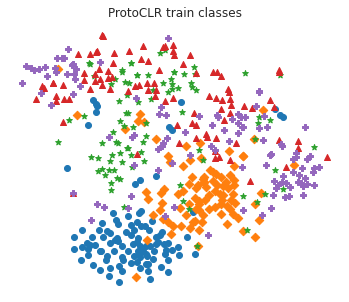

In [21]:
plot2d(X_2d=X_protoclr_2d_train, 
       y=y_protoclr_5_train,
       colors=colors[:5],
       title="ProtoCLR train classes",
       save_as='protoclr_train_set_tsne.pdf')

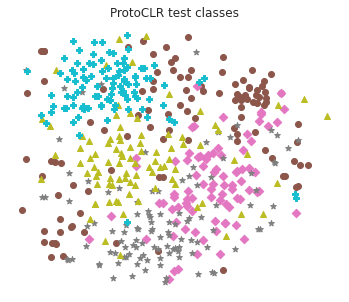

In [22]:
plot2d(X_2d=X_protoclr_2d_test, 
       y=y_protoclr_5_test,
       colors=colors[5:],
       title="ProtoCLR test classes",
       save_as='protoclr_test_set_tsne.pdf')

## 2: t-SNE plots for ProtoNet

In [12]:
f_protonet_train = h5py.File('featuresProtoNet_mini-ImageNet_train.hdf5', 'r')
f_protonet_test = h5py.File('featuresProtoNet_mini-ImageNet_test.hdf5', 'r')

In [13]:
X_protonet_5_train = f_protonet_train['all_feats']
y_protonet_5_train = f_protonet_train['all_labels']
X_protonet_5_test = f_protonet_test['all_feats']
y_protonet_5_test = f_protonet_test['all_labels']

In [14]:
train_protonet_idx = random.sample(range(len(y_protonet_5_train)),500)
train_protonet_idx.sort()

X_protonet_5_train = X_protonet_5_train[train_protonet_idx]
y_protonet_5_train = y_protonet_5_train[train_protonet_idx]

test_protonet_idx = random.sample(range(len(y_protonet_5_test)),500)
test_protonet_idx.sort()

X_protonet_5_test = X_protonet_5_test[test_protonet_idx]
y_protonet_5_test = y_protonet_5_test[test_protonet_idx]

In [15]:
tsne = TSNE(n_components=2, random_state=0)
X_protonet_2d_train = tsne.fit_transform(X_protonet_5_train)

In [16]:
tsne = TSNE(n_components=2, random_state=0)
X_protonet_2d_test = tsne.fit_transform(X_protonet_5_test)

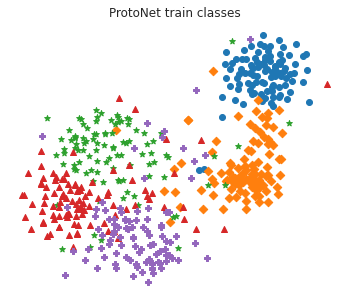

In [17]:
plot2d(X_2d=X_protonet_2d_train, 
       y=y_protonet_5_train,
       colors=colors[:5],
       title="ProtoNet train classes",
       save_as='protonet_train_set_tsne.pdf')

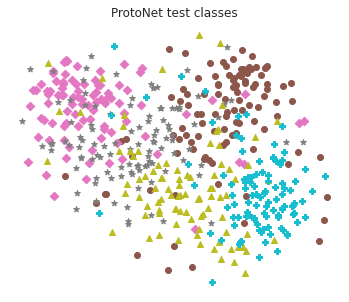

In [18]:
plot2d(X_2d=X_protonet_2d_test, 
       y=y_protonet_5_test,
       colors=colors[5:],
       title="ProtoNet test classes",
       save_as='protonet_test_set_tsne.pdf')